#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### importing data

In [4]:
claimants_data = pd.read_csv('claimants.csv')
claimants_data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [5]:
claimants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


#### data preparation

In [6]:
del claimants_data['CASENUM']

In [7]:
claimants_data.dropna(inplace=True)

In [8]:
claimants_data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

### Model Building

In [10]:
X = claimants_data.drop(labels=['ATTORNEY'],axis = 1)
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [14]:
y = claimants_data[['ATTORNEY']]
y.head()

,ATTORNEY
0,0
1,1
2,1
3,0
4,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=12)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((876, 5), (220, 5), (876, 1), (220, 1))

### Model Training and testing

In [57]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(class_weight="balanced")
log_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [58]:
y_pred_test = log_model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [59]:
y_pred_train = log_model.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,

### Model evaluation

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
accuracy_score(y_train,y_pred_train)

0.6997716894977168

In [62]:
accuracy_score(y_test,y_pred_test)

0.6727272727272727

In [63]:
confusion_matrix(y_train,y_pred_train)

array([[294, 170],
       [ 93, 319]])

In [64]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       464
           1       0.65      0.77      0.71       412

    accuracy                           0.70       876
   macro avg       0.71      0.70      0.70       876
weighted avg       0.71      0.70      0.70       876



In [35]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, threshold = roc_curve(y, log_model.predict_proba (X)[:,1])

auc  = roc_auc_score(y_train, y_pred_train)

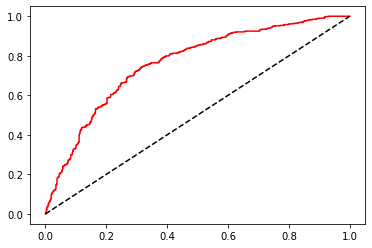

In [39]:
plt.plot(fpr,tpr, color='red', label = 'logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')